# 컨볼루션 신경망 모델 만들어보기

In [7]:
# 0. 사용할 패키지 불러오기
import numpy as np
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import Flatten
from keras.layers.convolutional import Conv2D
from keras.layers.convolutional import MaxPooling2D
from keras.preprocessing.image import ImageDataGenerator

# 랜덤시드 고정시키기
np.random.seed(3)

# 1. 데이터 생성하기
train_datagen = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_directory(
        './handwriting_shape/train',
        target_size=(24, 24),
        batch_size=3,
        class_mode='categorical')

test_datagen = ImageDataGenerator(rescale=1./255)

test_generator = test_datagen.flow_from_directory(
        './handwriting_shape/test',
        target_size=(24, 24),    
        batch_size=3,
        class_mode='categorical')

# 2. 모델 구성하기
model = Sequential()
model.add(Conv2D(32, kernel_size=(3, 3),
                 activation='relu',
                 input_shape=(24,24,3)))
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dense(3, activation='softmax'))



Found 45 images belonging to 3 classes.
Found 15 images belonging to 3 classes.


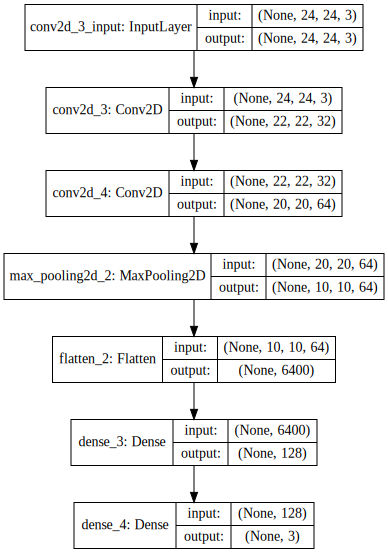

In [8]:
from IPython.display import SVG
from keras.utils.vis_utils import model_to_dot

%matplotlib inline

SVG(model_to_dot(model, show_shapes=True).create(prog='dot', format='svg'))

In [9]:
# 3. 모델 학습과정 설정하기
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

In [10]:
# 4. 모델 학습시키기
model.fit_generator(
        train_generator,
        steps_per_epoch=15,
        epochs=50,
        validation_data=test_generator,
        validation_steps=5)

Epoch 1/50
15/15 [==============================] - 0s 22ms/step - loss: 0.9151 - acc: 0.6000 - val_loss: 0.4086 - val_acc: 0.9333
Epoch 2/50
15/15 [==============================] - 0s 17ms/step - loss: 0.1624 - acc: 0.9333 - val_loss: 0.1549 - val_acc: 0.9333
Epoch 3/50
15/15 [==============================] - 0s 17ms/step - loss: 0.0178 - acc: 1.0000 - val_loss: 0.0462 - val_acc: 1.0000
Epoch 4/50
15/15 [==============================] - 0s 18ms/step - loss: 0.0031 - acc: 1.0000 - val_loss: 0.0591 - val_acc: 0.9333
Epoch 5/50
15/15 [==============================] - 0s 18ms/step - loss: 7.6935e-04 - acc: 1.0000 - val_loss: 0.0467 - val_acc: 1.0000
Epoch 6/50
15/15 [==============================] - 0s 17ms/step - loss: 3.4711e-04 - acc: 1.0000 - val_loss: 0.0377 - val_acc: 1.0000
Epoch 7/50
15/15 [==============================] - 0s 17ms/step - loss: 2.4380e-04 - acc: 1.0000 - val_loss: 0.0317 - val_acc: 1.0000
Epoch 8/50
15/15 [==============================] - 0s 18ms/step - loss

In [11]:
# 6. 모델 평가하기
print("-- Evaluate --")
scores = model.evaluate_generator(test_generator, steps=5)
print("%s: %.2f%%" %(model.metrics_names[1], scores[1]*100))

-- Evaluate --
acc: 100.00%


In [12]:
# 7. 모델 사용하기
print("-- Predict --")
output = model.predict_generator(test_generator, steps=5)
np.set_printoptions(formatter={'float': lambda x: "{0:0.3f}".format(x)})
print(test_generator.class_indices)
print(output)

-- Predict --
{'circle': 0, 'triangle': 2, 'rectangle': 1}
[[1.000 0.000 0.000]
 [0.000 0.000 1.000]
 [1.000 0.000 0.000]
 [0.000 1.000 0.000]
 [0.000 1.000 0.000]
 [1.000 0.000 0.000]
 [0.000 0.000 1.000]
 [0.060 0.877 0.063]
 [0.000 1.000 0.000]
 [0.000 0.000 1.000]
 [1.000 0.000 0.000]
 [0.998 0.000 0.002]
 [0.000 0.001 0.999]
 [0.000 0.031 0.969]
 [0.000 1.000 0.000]]
